# Try to remove doublet from macaque Multiome RNA-seq data using scrublet

In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
os.chdir('/data/User/sunym/project/Brain/')
os.getcwd()

'/mnt/disks/bioinfo/User/sunym/project/Brain'

## A50A

### read data

In [4]:
RNA = pd.read_csv('/data/User/sunym/temp/A50A.csv')
RNA = RNA.drop(columns=['Unnamed: 0'])
RNA = RNA.T
RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACAGCCAAATTCGT.1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAACAGCCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAGGTAAC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAGGTACG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAATCTCTC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGAGCACT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTACGCGG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTAGCGTA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTCACTGT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
cell_list = RNA.index
cell_list

Index(['AAACAGCCAAATTCGT.1', 'AAACAGCCAACAGCCT.1', 'AAACAGCCAAGGTAAC.1',
       'AAACAGCCAAGGTACG.1', 'AAACAGCCAATCTCTC.1', 'AAACAGCCACAAAGAC.1',
       'AAACAGCCACTTCACT.1', 'AAACAGCCAGATAGAC.1', 'AAACATGCAAGCGATG.1',
       'AAACATGCAAGGTATA.1',
       ...
       'TTTGTTGGTAATGGAA.1', 'TTTGTTGGTCAAAGAA.1', 'TTTGTTGGTCACACCC.1',
       'TTTGTTGGTCATAACG.1', 'TTTGTTGGTGACCTGG.1', 'TTTGTTGGTGAGCACT.1',
       'TTTGTTGGTTACGCGG.1', 'TTTGTTGGTTAGCGTA.1', 'TTTGTTGGTTCACTGT.1',
       'TTTGTTGGTTTATTCG.1'],
      dtype='object', length=18707)

In [6]:
RNA = RNA.values

### scrublet

In [7]:
scrub = scr.Scrublet(RNA, expected_doublet_rate=0.1)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.20
Detected doublet rate = 15.8%
Estimated detectable doublet fraction = 64.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 24.8%
Elapsed time: 32.2 seconds


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

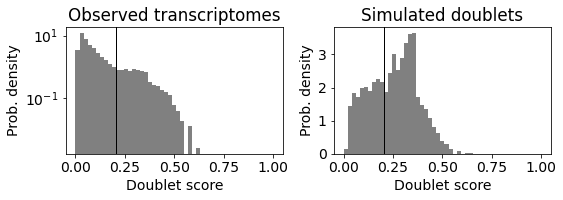

In [8]:
scrub.plot_histogram()

Running UMAP...
Done.


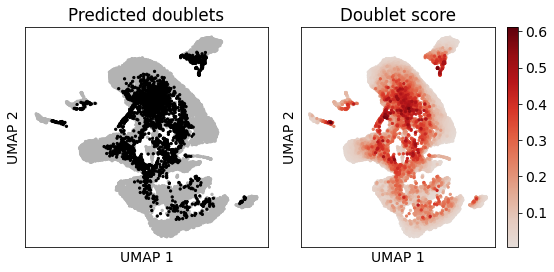

In [9]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [10]:
a = np.array([cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_15_fig_220208/A50A_scrublet_220208.txt', index=False,header=True)

## A50B

### read data

In [11]:
RNA = pd.read_csv('/data/User/sunym/temp/A50B.csv')
RNA = RNA.drop(columns=['Unnamed: 0'])
RNA = RNA.T
RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACAGCCAAAGCTCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAATTCGT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAGGATTA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCACCACAAC.1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCACGTTACA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCTCGACCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTATACTGG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTCATGCCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTGGGAACA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
cell_list = RNA.index
cell_list

Index(['AAACAGCCAAAGCTCC.1', 'AAACAGCCAAATTCGT.1', 'AAACAGCCAAGGATTA.1',
       'AAACAGCCACCACAAC.1', 'AAACAGCCACGTTACA.1', 'AAACAGCCAGCAAGAT.1',
       'AAACAGCCAGCCGCTA.1', 'AAACAGCCAGTAGGAT.1', 'AAACAGCCATCTAGCA.1',
       'AAACAGCCATGAAATG.1',
       ...
       'TTTGTGTTCCATAAGC.1', 'TTTGTGTTCCCTCACG.1', 'TTTGTGTTCCTAAGGT.1',
       'TTTGTGTTCCTAGTCC.1', 'TTTGTGTTCTAACTGA.1', 'TTTGTGTTCTCGACCT.1',
       'TTTGTTGGTATACTGG.1', 'TTTGTTGGTCATGCCC.1', 'TTTGTTGGTGGGAACA.1',
       'TTTGTTGGTTAGCGTA.1'],
      dtype='object', length=20000)

In [13]:
RNA = RNA.values

### scrublet

In [14]:
scrub = scr.Scrublet(RNA, expected_doublet_rate=0.13)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 9.6%
Estimated detectable doublet fraction = 40.3%
Overall doublet rate:
	Expected   = 13.0%
	Estimated  = 23.9%
Elapsed time: 32.7 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

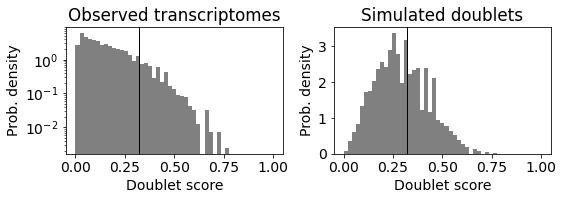

In [15]:
scrub.plot_histogram()

Running UMAP...
Done.


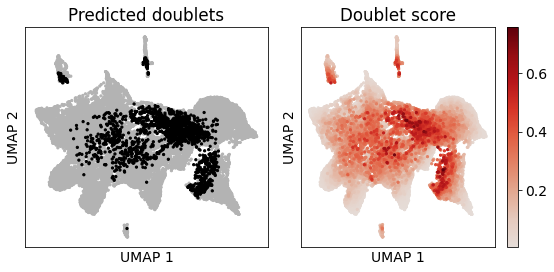

In [16]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [17]:
a = np.array([cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_15_fig_220208/A50B_scrublet_220208.txt', index=False,header=True)

## A82A

### read data

In [18]:
RNA = pd.read_csv('/data/User/sunym/temp/A82A.csv')
RNA = RNA.drop(columns=['Unnamed: 0'])
RNA = RNA.T
RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACAGCCAAACTGTT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAAGCGGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAACTCGCG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAGGTACG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAAGTCGCT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTAAGGTTT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTCAAAGAA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTGGCTTCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTAACGGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
cell_list = RNA.index
cell_list

Index(['AAACAGCCAAACTGTT.1', 'AAACAGCCAAAGCGGC.1', 'AAACAGCCAACTCGCG.1',
       'AAACAGCCAAGGTACG.1', 'AAACAGCCAAGTCGCT.1', 'AAACAGCCACTGGCCA.1',
       'AAACAGCCACTGGCTG.1', 'AAACAGCCAGCAACAG.1', 'AAACATGCAAACATAG.1',
       'AAACATGCAATCATGT.1',
       ...
       'TTTGTGTTCGACCTGA.1', 'TTTGTGTTCGAGGAAC.1', 'TTTGTGTTCGAGGAGT.1',
       'TTTGTGTTCGTTCACC.1', 'TTTGTGTTCTGGCTTC.1', 'TTTGTTGGTAAGGTTT.1',
       'TTTGTTGGTCAAAGAA.1', 'TTTGTTGGTGGCTTCC.1', 'TTTGTTGGTTAACGGC.1',
       'TTTGTTGGTTGAGCCG.1'],
      dtype='object', length=19296)

In [20]:
RNA = RNA.values

### scrublet

In [21]:
scrub = scr.Scrublet(RNA, expected_doublet_rate=0.14)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.22
Detected doublet rate = 23.7%
Estimated detectable doublet fraction = 76.1%
Overall doublet rate:
	Expected   = 14.0%
	Estimated  = 31.1%
Elapsed time: 33.0 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

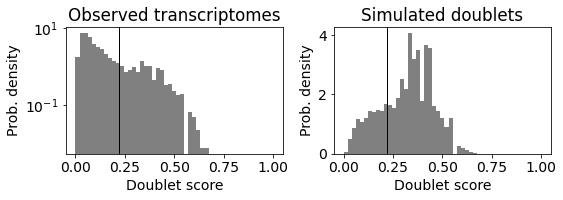

In [22]:
scrub.plot_histogram()

Running UMAP...
Done.


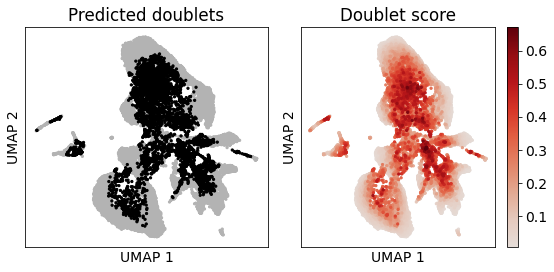

In [23]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [24]:
a = np.array([cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_15_fig_220208/A82A_scrublet_220208.txt', index=False,header=True)

## A82B

### read data

In [25]:
RNA = pd.read_csv('/data/User/sunym/temp/A82B.csv')
RNA = RNA.drop(columns=['Unnamed: 0'])
RNA = RNA.T
RNA

,0,1,2,3,4,5,6,7,8,9,...,35422,35423,35424,35425,35426,35427,35428,35429,35430,35431
AAACAGCCAAGGTACG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAATATGGA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCAATTATGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCACAGCCAT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACAGCCACCTCAGG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTTGGATAT.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTGGTTGA.1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTGTAACG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTTTAACCC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
cell_list = RNA.index
cell_list

Index(['AAACAGCCAAGGTACG.1', 'AAACAGCCAATATGGA.1', 'AAACAGCCAATTATGC.1',
       'AAACAGCCACAGCCAT.1', 'AAACAGCCACCTCAGG.1', 'AAACAGCCACCTGTAA.1',
       'AAACAGCCACTCAACA.1', 'AAACAGCCAGCTCATA.1', 'AAACAGCCAGGCTTCG.1',
       'AAACAGCCATAATCCG.1',
       ...
       'TTTGTTGGTCCACAAA.1', 'TTTGTTGGTCGCGCAA.1', 'TTTGTTGGTGCATTAG.1',
       'TTTGTTGGTGTTGCAA.1', 'TTTGTTGGTTATAGCG.1', 'TTTGTTGGTTGGATAT.1',
       'TTTGTTGGTTGGTTGA.1', 'TTTGTTGGTTGTAACG.1', 'TTTGTTGGTTTAACCC.1',
       'TTTGTTGGTTTGGCTT.1'],
      dtype='object', length=20000)

In [27]:
RNA = RNA.values

### scrublet

In [28]:
scrub = scr.Scrublet(RNA, expected_doublet_rate=0.11)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.13
Detected doublet rate = 36.7%
Estimated detectable doublet fraction = 85.8%
Overall doublet rate:
	Expected   = 11.0%
	Estimated  = 42.8%
Elapsed time: 36.6 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

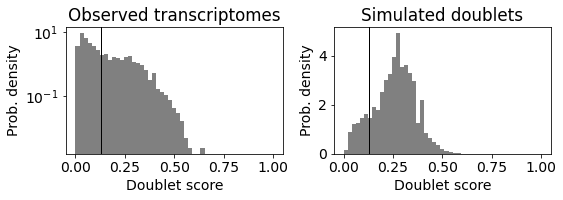

In [29]:
scrub.plot_histogram()

Running UMAP...
Done.


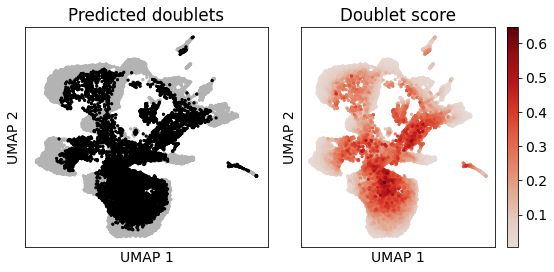

In [30]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [31]:
a = np.array([cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('./res/step_15_fig_220208/A82B_scrublet_220208.txt', index=False,header=True)